<a id="5"></a>


<font color="black" size=+1><b> Classification of Tuberculosis Disease from 2019-2021 using Artificial Neural Network (ANN) </b></font>

<a id="4"></a>

---
<font color="GREEN" size=+1><b>  Kelompok 4 -Modelling </b></font>

---
    Nama Anggota
    1. Nadya Dioranta Tambunan        DS04037
    2. Agnes Veronika Sihombing       DS04032
    4. Hanna Dhea Christi Sihombing   DS04043

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from numpy.core.defchararray import add
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DAMI/data_dami_new.csv')
df

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
1,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
2,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
3,75453396,75453396,1959-08-25,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,JAWA TENGAH,BLORA,...,RAWAT INAP,RJTP,BUKAN PEKERJA,R06 Abnormalities of breathing,R06,R060,Dyspnoea,Evakuasi medis / Ambulans Darat,161700,161700
4,75453396,75453396,1959-08-25,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,JAWA TENGAH,BLORA,...,RAWAT INAP,RJTP,BUKAN PEKERJA,R06 Abnormalities of breathing,R06,R060,Dyspnoea,Evakuasi medis / Ambulans Darat,161700,161700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,426032113,408166141,1982-09-10,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,SULAWESI SELATAN,TAKALAR,...,NON RAWAT INAP,RITP,PBI APBN,R19 Other symptoms and signs involving the dig...,R19,R198,Other specified symptoms and signs involving t...,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
109475,426032113,408166141,1982-09-10,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,SULAWESI SELATAN,TAKALAR,...,NON RAWAT INAP,RITP,PBI APBN,R19 Other symptoms and signs involving the dig...,R19,R198,Other specified symptoms and signs involving t...,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
109476,402406574,402406574,1959-09-09,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,NUSA TENGGARA BARAT,SUMBAWA,...,RAWAT INAP,RJTP,PBI APBN,K29 Gastritis and duodenitis,K29,K297,"Gastritis, unspecified",Evakuasi medis / Ambulans Darat,80000,80000
109477,402406574,402406574,1959-09-09,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,NUSA TENGGARA BARAT,SUMBAWA,...,RAWAT INAP,RJTP,PBI APBN,K29 Gastritis and duodenitis,K29,K297,"Gastritis, unspecified",Evakuasi medis / Ambulans Darat,80000,80000


### Check Missing Value

In [4]:
df.isna().sum()

PSTV01    0
PSTV02    0
PSTV03    0
PSTV04    0
PSTV05    0
PSTV06    0
PSTV07    0
PSTV08    0
PSTV09    0
PSTV10    0
PSTV11    0
PSTV12    0
PSTV13    0
PSTV14    0
PSTV15    0
PSTV16    0
PSTV17    0
PSTV18    0
PNK02     0
PNK03     0
PNK04     0
PNK05     0
PNK06     0
PNK07     0
PNK08     0
PNK09     0
PNK10     0
PNK11     0
PNK12     0
PNK13     0
PNK13A    6
PNK14     0
PNK15     0
PNK16     0
PNK17     0
PNK18     0
dtype: int64

#### Handling missing value

In [5]:
# handling missing value
df['PNK13A'] = df['PNK13A'].fillna('Tidak Terdeteksi')

In [6]:
df['PNK13A']

0         O80
1         O80
2         O80
3         R06
4         R06
         ... 
109474    R19
109475    R19
109476    K29
109477    K29
109478    K29
Name: PNK13A, Length: 109479, dtype: object

### Check Duplicated

In [9]:
df = df.duplicated()
df.sum()

1461

#### Drop Duplicated

In [ ]:
df = df.drop_duplicates(keep='first', inplace=False)

In [ ]:
df = df.duplicated()
df.sum()

0

## Check Outlier

<Axes: xlabel='PNK17'>

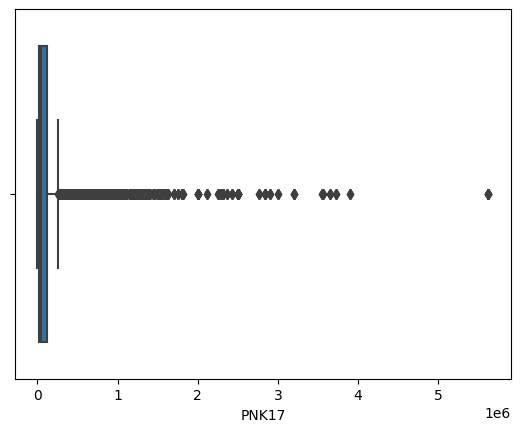

In [9]:
import seaborn as sns
sns.boxplot(x=df['PNK17'])

In [10]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)  # Corrected to 0.75 for the third quartile
IQR = Q3 - Q1

df = df[~((df.lt(Q1 - 1.5 * IQR)) | (df.gt(Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(65643, 20)

### Check Data Unique

In [57]:
df.nunique()

PSTV01     3081
PSTV02     3069
PSTV03     2628
PSTV04        5
PSTV05        2
PSTV06        3
PSTV07        3
PSTV08        5
PSTV09       34
PSTV10      435
PSTV11        8
PSTV12        3
PSTV13       34
PSTV14      437
PSTV15     2409
PSTV16        3
PSTV17        3
PSTV18        4
PNK02     10260
PNK03      2327
PNK04      2326
PNK05      2326
PNK06        34
PNK07       403
PNK08         6
PNK09         6
PNK10        10
PNK11         3
PNK12         5
PNK13       339
PNK13A      339
PNK14       615
PNK15       615
PNK16        33
PNK17       355
PNK18       355
dtype: int64

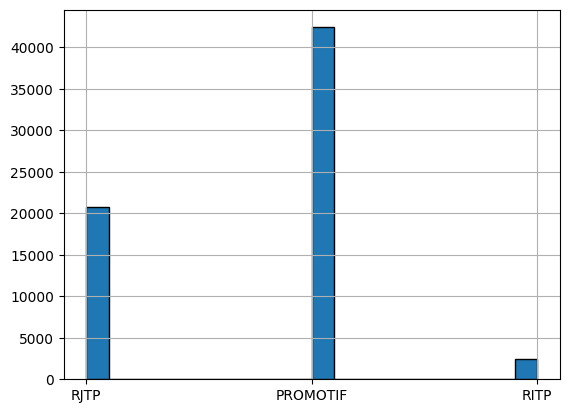

In [58]:
df['PNK11'].hist(edgecolor='black', bins=20);

### Check Corellation

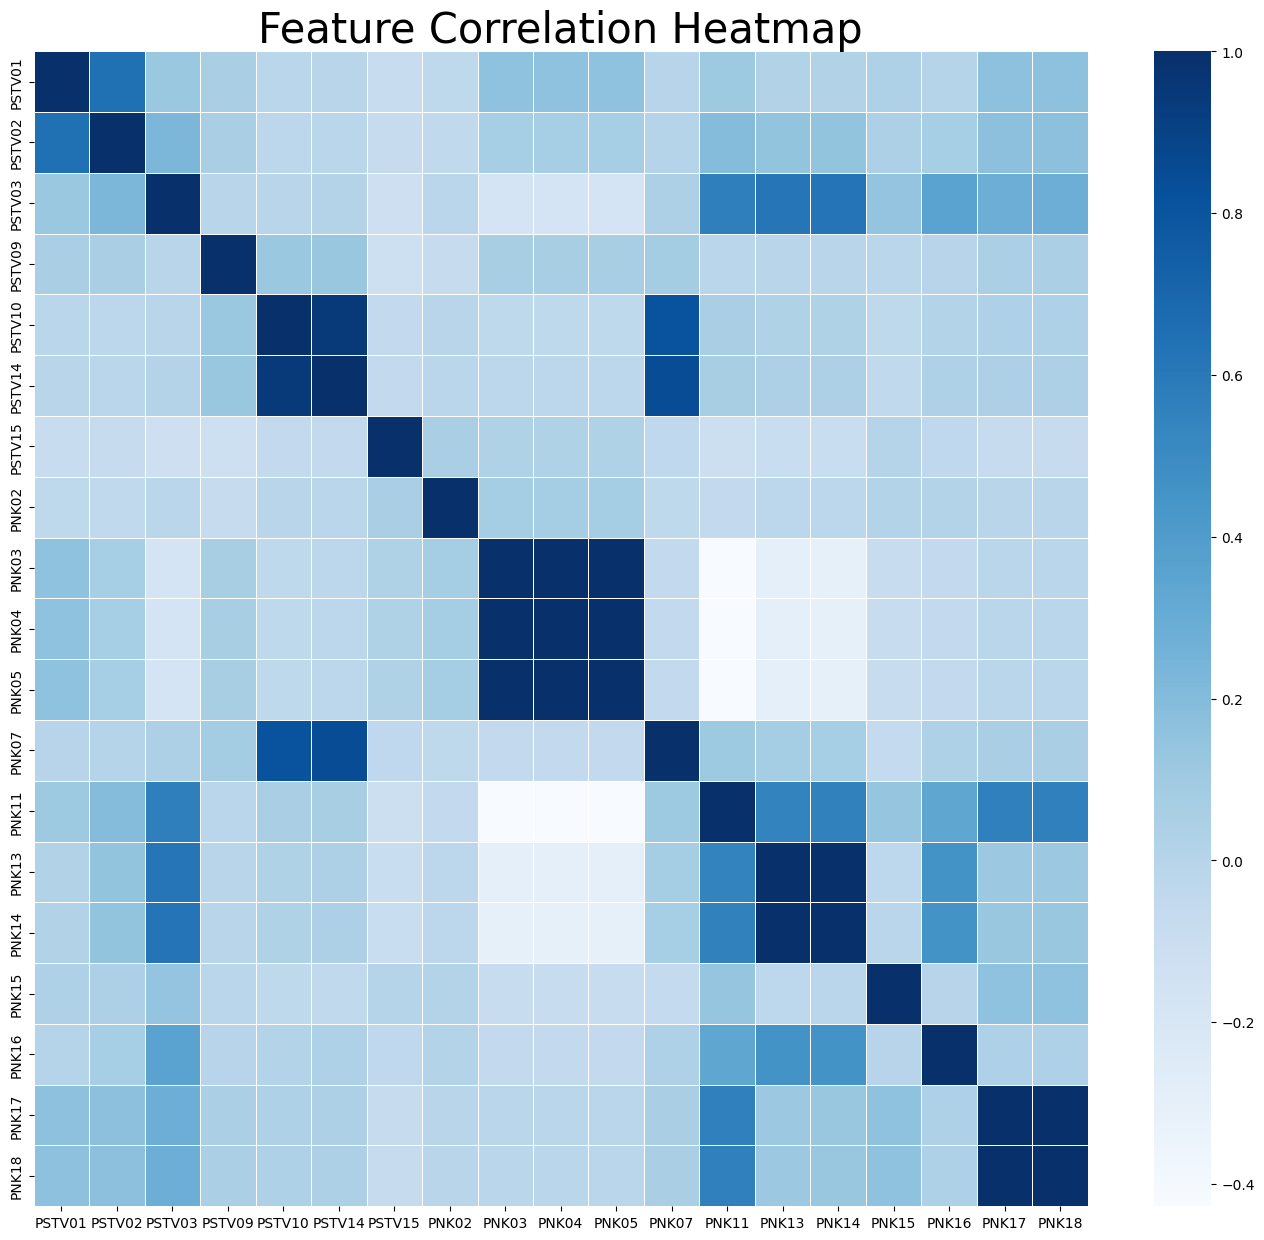

In [31]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap show the correlation between features
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', linewidths=.5)

plt.title('Feature Correlation Heatmap', fontsize=30)

plt.show()

### Drop Unwanted Feature


In [7]:
df.drop(['PSTV18', 'PSTV17', 'PSTV16', 'PSTV11', 'PSTV12',
         'PSTV08', 'PSTV13', 'PSTV07', 'PSTV04','PSTV06',
         'PNK13A', 'PNK12', 'PSTV05', 'PNK06', 'PNK09', 'PNK08'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65643 entries, 3 to 109457
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PSTV01  65643 non-null  int64  
 1   PSTV02  65643 non-null  int64  
 2   PSTV03  65643 non-null  int64  
 3   PSTV09  65643 non-null  int64  
 4   PSTV10  65643 non-null  int64  
 5   PSTV14  65643 non-null  int64  
 6   PSTV15  65643 non-null  float64
 7   PNK02   65643 non-null  int64  
 8   PNK03   65643 non-null  int64  
 9   PNK04   65643 non-null  int64  
 10  PNK05   65643 non-null  int64  
 11  PNK07   65643 non-null  int64  
 12  PNK10   65643 non-null  int64  
 13  PNK11   65643 non-null  int64  
 14  PNK13   65643 non-null  int64  
 15  PNK14   65643 non-null  int64  
 16  PNK15   65643 non-null  int64  
 17  PNK16   65643 non-null  int64  
 18  PNK17   65643 non-null  int64  
 19  PNK18   65643 non-null  int64  
dtypes: float64(1), int64(19)
memory usage: 10.5 MB


### Check Data Imbalanced

In [8]:
All = df.shape[0]
RITP = df[df['PNK11'] == 'RITP']
RJTP = df[df['PNK11'] == 'RJTP']
PROMOTIF = df[df['PNK11'] == 'PROMOTIF']

totalRITP = len(RITP)/All
totalRJTP = len(RJTP)/All
totalPromotif = len(PROMOTIF)/All

print('RITP :', totalRITP * 100, '%')
print('RJTP :', totalRJTP * 100, '%')
print('PROMOTIF :', totalPromotif * 100, '%')

RITP : 12.933987340037815 %
RJTP : 35.045077138081275 %
PROMOTIF : 52.02093552188091 %


In [43]:
from imblearn.under_sampling import RandomUnderSampler

train_data = pd.concat([X_train, Y_train], axis=1)
class_counts = Y_train['PNK11'].value_counts()
undersample_size = min(class_counts)
rus = RandomUnderSampler(sampling_strategy={0: undersample_size, 1: undersample_size, 2: undersample_size}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train['PNK11'])
print(pd.Series(y_resampled).value_counts(normalize=True))

0    0.333333
1    0.333333
2    0.333333
Name: PNK11, dtype: float64


## Transformasi

In [11]:
df['PNK11'].replace(to_replace = ['RITP', 'RJTP', 'PROMOTIF'], value = [2, 1, 0], inplace = True)

<ipython-input-11-f891856492b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PNK11'].replace(to_replace = ['RITP', 'RJTP', 'PROMOTIF'], value = [2, 1, 0], inplace = True)


In [12]:
data_categorical = df.select_dtypes(include=['object']).copy()

In [13]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65643 entries, 3 to 109457
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PSTV03  65643 non-null  object
 1   PSTV09  65643 non-null  object
 2   PSTV10  65643 non-null  object
 3   PSTV14  65643 non-null  object
 4   PNK02   65643 non-null  object
 5   PNK03   65643 non-null  object
 6   PNK04   65643 non-null  object
 7   PNK05   65643 non-null  object
 8   PNK07   65643 non-null  object
 9   PNK10   65643 non-null  object
 10  PNK13   65643 non-null  object
 11  PNK14   65643 non-null  object
 12  PNK15   65643 non-null  object
 13  PNK16   65643 non-null  object
dtypes: object(14)
memory usage: 7.5+ MB


In [14]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [15]:
df['PSTV03'] = LE.fit_transform(df['PSTV03'])
#df['PSTV04'] = LE.fit_transform(df['PSTV04'])
#df['PSTV05'] = LE.fit_transform(df['PSTV05'])
#df['PSTV06'] = LE.fit_transform(df['PSTV06'])
#df['PSTV12'] = LE.fit_transform(df['PSTV12'])
#df['PSTV07'] = LE.fit_transform(df['PSTV07'])
df['PSTV09'] = LE.fit_transform(df['PSTV09'])
df['PSTV10'] = LE.fit_transform(df['PSTV10'])
#df['PSTV11'] = LE.fit_transform(df['PSTV11'])
#df['PSTV13'] = LE.fit_transform(df['PSTV13'])
df['PSTV14'] = LE.fit_transform(df['PSTV14'])
#df['PSTV17'] = LE.fit_transform(df['PSTV17'])
#df['PSTV18'] = LE.fit_transform(df['PSTV18'])
df['PNK02'] = LE.fit_transform(df['PNK02'])
df['PNK03'] = LE.fit_transform(df['PNK03'])
df['PNK04'] = LE.fit_transform(df['PNK04'])
df['PNK05'] = LE.fit_transform(df['PNK05'])
#df['PNK06'] = LE.fit_transform(df['PNK06'])
df['PNK07'] = LE.fit_transform(df['PNK07'])
#df['PNK08'] = LE.fit_transform(df['PNK08'])
#df['PNK09'] = LE.fit_transform(df['PNK09'])
df['PNK10'] = LE.fit_transform(df['PNK10'])
#df['PSTV08'] = LE.fit_transform(df['PSTV08'])
#df['PNK12'] = LE.fit_transform(df['PSTV12'])
df['PNK13'] = LE.fit_transform(df['PNK13'])
#df['PNK13A'] = LE.fit_transform(df['PNK13A'])
df['PNK14'] = LE.fit_transform(df['PNK14'])
df['PNK15'] = LE.fit_transform(df['PNK15'])
df['PNK16'] = LE.fit_transform(df['PNK16'])

<ipython-input-15-d16e501b1296>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PSTV03'] = LE.fit_transform(df['PSTV03'])
<ipython-input-15-d16e501b1296>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PSTV09'] = LE.fit_transform(df['PSTV09'])
<ipython-input-15-d16e501b1296>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df['PSTV03'] = LE.fit_transform(df['PSTV03'])
df['PSTV04'] = LE.fit_transform(df['PSTV04'])
df['PSTV05'] = LE.fit_transform(df['PSTV05'])
df['PSTV06'] = LE.fit_transform(df['PSTV06'])
df['PSTV07'] = LE.fit_transform(df['PSTV07'])
df['PSTV08'] = LE.fit_transform(df['PSTV08'])
df['PSTV09'] = LE.fit_transform(df['PSTV09'])
df['PSTV10'] = LE.fit_transform(df['PSTV10'])
df['PSTV11'] = LE.fit_transform(df['PSTV11'])
df['PSTV12'] = LE.fit_transform(df['PSTV12'])
df['PSTV13'] = LE.fit_transform(df['PSTV13'])
df['PSTV14'] = LE.fit_transform(df['PSTV14'])
df['PSTV17'] = LE.fit_transform(df['PSTV17'])
df['PNK02'] = LE.fit_transform(df['PNK02'])
df['PNK03'] = LE.fit_transform(df['PNK03'])
df['PNK04'] = LE.fit_transform(df['PNK04'])
df['PNK05'] = LE.fit_transform(df['PNK05'])
df['PNK06'] = LE.fit_transform(df['PNK06'])
df['PNK07'] = LE.fit_transform(df['PNK07'])
df['PNK08'] = LE.fit_transform(df['PNK08'])
df['PNK09'] = LE.fit_transform(df['PNK09'])
df['PNK10'] = LE.fit_transform(df['PNK10'])
df['PNK12'] = LE.fit_transform(df['PSTV12'])
df['PNK13'] = LE.fit_transform(df['PNK13'])
df['PNK13A'] = LE.fit_transform(df['PNK13A'])
df['PNK14'] = LE.fit_transform(df['PNK14'])
df['PNK15'] = LE.fit_transform(df['PNK15'])
df['PNK16'] = LE.fit_transform(df['PNK16'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109479 entries, 0 to 109478
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PSTV01  109479 non-null  int64  
 1   PSTV02  109479 non-null  int64  
 2   PSTV03  109479 non-null  int64  
 3   PSTV09  109479 non-null  int64  
 4   PSTV10  109479 non-null  int64  
 5   PSTV14  109479 non-null  int64  
 6   PSTV15  109479 non-null  float64
 7   PNK02   109479 non-null  int64  
 8   PNK03   109479 non-null  int64  
 9   PNK04   109479 non-null  int64  
 10  PNK05   109479 non-null  int64  
 11  PNK07   109479 non-null  int64  
 12  PNK10   109479 non-null  int64  
 13  PNK11   109479 non-null  int64  
 14  PNK13   109479 non-null  int64  
 15  PNK14   109479 non-null  int64  
 16  PNK15   109479 non-null  int64  
 17  PNK16   109479 non-null  int64  
 18  PNK17   109479 non-null  int64  
 19  PNK18   109479 non-null  int64  
dtypes: float64(1), int64(19)
memory usage: 16.7 MB


## Preprocessing data for Classification

### Splitting data in X and Y

In [16]:
X = df.drop(['PNK11'], axis=1)
Y = df[['PNK11']]

In [17]:
X

,PSTV01,PSTV02,PSTV03,PSTV09,PSTV10,PSTV14,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK07,PNK10,PNK13,PNK14,PNK15,PNK16,PNK17,PNK18
3,75453396,75453396,622,9,47,49,10.173553,6651,1525,1524,1523,48,7,255,464,153,0,161700,161700
4,75453396,75453396,622,9,47,49,10.173553,6651,1525,1524,1523,48,7,255,464,153,0,161700,161700
5,75453396,75453396,622,9,47,49,10.173553,6651,1525,1524,1523,48,7,255,464,153,0,161700,161700
6,98396595,98396595,820,10,250,251,1.258935,1239,1496,1495,1494,240,3,73,153,420,0,112500,112500
7,98396595,98396595,820,10,250,251,1.258935,1239,1496,1495,1494,240,3,73,153,420,0,112500,112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109453,36617345,36617345,750,31,382,384,3.182838,8430,1324,1323,1322,357,7,125,250,101,0,135000,135000
109454,36617345,36617345,750,31,382,384,3.182838,8431,1348,1347,1346,357,7,33,74,505,0,135000,135000
109455,36617345,36617345,750,31,382,384,3.182838,8430,1324,1323,1322,357,7,125,250,101,0,135000,135000
109456,36617345,36617345,750,31,382,384,3.182838,8431,1348,1347,1346,357,7,33,74,505,0,135000,135000


In [18]:
Y

,PNK11
3,1
4,1
5,1
6,1
7,1
...,...
109453,1
109454,1
109455,1
109456,1


### Splitting data in train and test

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (50216, 19)
X_val (8862, 19)
X_test (6565, 19)


In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
#print(f"Shape of X_train is: {X_train.shape}")
#print(f"Shape of Y_train is: {Y_train.shape}\n")
#print(f"Shape of X_test is: {X_test.shape}")
#print(f"Shape of Y_test is: {Y_test.shape}")

## Creating ANN Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu', max_iter=1000, epsilon=1e-08)

In [22]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi Validasi Training ANN: 0.8115549537350485


In [23]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.8127951256664128


In [25]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, 3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test, 3)

In [26]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [27]:
classifier = Sequential()
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(3,activation='softmax'))

In [28]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [29]:
result = classifier.fit(X_train, Y_train, epochs=10,batch_size=5, validation_data=(X_val,Y_val))

Epoch 1/10
10044/10044 [==============================] - 20s 2ms/step - loss: 126933.7578 - acc: 0.5470 - val_loss: 44301.3164 - val_acc: 0.6670
Epoch 2/10
10044/10044 [==============================] - 19s 2ms/step - loss: 77498.0781 - acc: 0.5788 - val_loss: 63738.6992 - val_acc: 0.6809
Epoch 3/10
10044/10044 [==============================] - 19s 2ms/step - loss: 47414.1055 - acc: 0.6038 - val_loss: 7334.7676 - val_acc: 0.7978
Epoch 4/10
10044/10044 [==============================] - 20s 2ms/step - loss: 29360.7441 - acc: 0.6255 - val_loss: 19061.8457 - val_acc: 0.7194
Epoch 5/10
10044/10044 [==============================] - 19s 2ms/step - loss: 23400.1465 - acc: 0.6426 - val_loss: 12999.4316 - val_acc: 0.7004
Epoch 6/10
10044/10044 [==============================] - 19s 2ms/step - loss: 16358.5879 - acc: 0.6637 - val_loss: 15738.8525 - val_acc: 0.4546
Epoch 7/10
10044/10044 [==============================] - 28s 3ms/step - loss: 11213.7354 - acc: 0.6806 - val_loss: 10869.6895 - v

In [30]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1475 (5.76 KB)
Trainable params: 1475 (5.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
from sklearn.metrics import confusion_matrix

loss, accuracy = classifier.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

206/206 [==============================] - 0s 2ms/step - loss: 0.7722 - acc: 0.6402
Akurasi Testing ANN: 0.6402132511138916


In [32]:
from keras.utils import to_categorical

Y_test_one_hot = to_categorical(Y_test, num_classes=3)

## Evaluating Model

In [24]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Assuming Y_val is in a multilabel format
mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)

# Print accuracy
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

# Print multilabel confusion matrix
cm = multilabel_confusion_matrix(Y_val, prediksi_val)
print('Multilabel Confusion Matrix:')
print(cm)

# Print classification report
print('Classification Report:')
print(classification_report(Y_val, prediksi_val))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi Validasi Training ANN: 0.700293387497179
Multilabel Confusion Matrix:
[[[1399 1760]
  [ 137 5566]]

 [[5974   78]
  [2354  456]]

 [[7695  818]
  [ 165  184]]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.85      5703
           1       0.85      0.16      0.27      2810
           2       0.18      0.53      0.27       349

    accuracy                           0.70      8862
   macro avg       0.60      0.56      0.47      8862
weighted avg       0.77      0.70      0.65      8862



In [35]:
# Assuming you have a trained model named 'model' and X_test is your test data
Y_pred = classifier.predict(X_test)

206/206 [==============================] - 2s 6ms/step


In [ ]:
import pickle
pickle.dump(classifier, open('/content/model.pkl','wb'))

from tensorflow.keras.utils import plot_model
plot_model(model,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

In [ ]:
acc = result.history['acc']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [ ]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])


,Accuracy,Loss,Epoch
0,0.500782,346540.750000,1
1,0.499087,108008.203125,2
2,0.492854,30449.841797,3
3,0.516674,2712.681641,4
4,0.629819,0.916656,5
5,0.629855,0.910986,6
6,0.629843,0.911012,7
7,0.629831,0.910997,8
8,0.629831,0.910978,9
9,0.629831,0.911000,10


In [ ]:
import plotly.graph_objs as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Loss'],
                         mode='lines+markers',
                         name = 'Loss'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Training Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy / Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()

## Evaluating Model

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)

343/343 [==============================] - 1s 2ms/step - loss: 0.9115 - acc: 0.6293


In [ ]:
print(f"Accuracy on unseen data is: { np.round(acc, 2) }")
print(f'Loss on unseen data is: { np.round(loss, 2) }')

Accuracy on unseen data is: 0.63
Loss on unseen data is: 0.91
